In [1]:
import xarray as xr
import importlib
import pandas as pd

package_name = "xarray"
package = importlib.import_module(package_name)

print(package.__version__)

2024.5.0


In [1]:
import xarray as xr
import pandas as pd
from bokeh.plotting import figure, show, output_notebook
from bokeh.embed import components
from bokeh.layouts import column, row
from bokeh.themes import Theme
from bokeh.io import curdoc
from bokeh.models import HoverTool, TapTool, CustomJS, DataRange1d, Spacer, Toggle

# # Enable the Bokeh output in the Jupyter notebook
# output_notebook()

# Define your latitude and longitude
lat = 16.4
lng = 81.8

# File paths for the NetCDF files
netcdf_file_path_hist = '/home/kishan/datahub/climate/GCM_DS1/EM_imd/historical/pr_1979_2014.nc'
netcdf_file_path_imd = '/home/kishan/datahub/meteorology/IMD/pr_interpolated_125.nc'
netcdf_file_path_ssp245 = '/home/kishan/datahub/climate/GCM_DS1/EM/ssp245_pr/pr_2015_2100.nc'
netcdf_file_path_ssp585 = '/home/kishan/datahub/climate/GCM_DS1/EM/ssp545_pr/pr_2015_2100.nc'

# Load the datasets
ds_hist = xr.open_dataset(netcdf_file_path_hist).sel(lat=lat, lon=lng, method='nearest').pr.drop_vars(['lat', 'lon'])
ds_imd = xr.open_dataset(netcdf_file_path_imd).sel(lat=lat, lon=lng, method='nearest').pr.drop_vars(['lat', 'lon'])
ds_ssp245 = xr.open_dataset(netcdf_file_path_ssp245).sel(lat=lat, lon=lng, method='nearest').pr.drop_vars(['lat', 'lon'])
ds_ssp585 = xr.open_dataset(netcdf_file_path_ssp585).sel(lat=lat, lon=lng, method='nearest').pr.drop_vars(['lat', 'lon'])

# Create a Bokeh figure
p = figure(x_axis_label='Date', y_axis_label='Precipitation Daily', x_axis_type='datetime', width=700, height=400, toolbar_location='above')

# Plot the time series data
observed = p.line(ds_imd.time, ds_imd.values, legend_label='IMD', color='red', line_width=2, visible=True)
hist_line = p.line(ds_hist.time, ds_hist.values, legend_label='Historical', color='orange', line_width=2, visible=True)
ssp245 = p.line(ds_ssp245.time, ds_ssp245.values, legend_label='SSP245', color='green', line_width=2, visible=True)
ssp585 = p.line(ds_ssp585.time, ds_ssp585.values, legend_label='SSP585', color='grey', line_width=2, visible=True)


show(p)


In [13]:
import pandas as pd




# Paths to your CSV files
csv_file_1 = '/home/kishan/datahub/Share/kishan/imd_daily/prec_79_23_4x_dist.csv'
csv_file_2 = '/home/kishan/datahub/Share/kishan/future_data_daily/prec_ssp585_dist.csv'



# Read the CSV files into DataFrames
df1 = pd.read_csv(csv_file_1)
df2 = pd.read_csv(csv_file_2)
df2['Date'] = pd.to_datetime(df2['Date'].str.split().str[0], format='%Y-%m-%d')
df2.set_index('Date', inplace=True)
df2
start_date_early = '2015-01-01'
end_date_early = '2040-12-31'
start_date_mid = '2041-01-01'
end_date_mid = '2070-12-31'
start_date_far = '2071-01-01'
end_date_far = '2100-12-31'
df2_filtered = df2.loc[start_date:end_date]
df2_filtered




,1,2,3,4,5,6,7,8,9,10,...,684,685,686,687,688,689,690,691,692,693
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,0.605603,0.373336,0.496535,0.725967,0.435340,0.429911,0.499348,0.356948,0.516356,0.517507,...,0.392217,0.428217,0.479055,0.412591,0.362768,0.385164,0.423530,0.341344,0.351974,0.329001
2015-01-02,1.214418,0.756296,1.322580,2.365444,1.098320,0.666139,0.741471,0.765489,1.036129,2.381945,...,0.517601,0.654156,0.867332,0.670178,0.668708,0.564887,0.610847,0.615464,0.466768,0.490289
2015-01-03,0.851057,0.396563,0.756300,1.262900,0.373850,0.527183,0.588856,0.349529,0.531784,0.647215,...,0.512895,0.721884,1.002018,0.797838,1.090303,0.636336,0.674860,0.914024,0.621828,0.675175
2015-01-04,0.456451,0.097295,0.420735,0.767629,0.135151,0.203294,0.134796,0.150523,0.184046,0.373840,...,0.643100,0.935603,1.016383,0.818324,1.107062,0.705896,0.762631,0.923928,0.647398,0.675136
2015-01-05,0.102849,0.081202,0.074062,0.154870,0.065310,0.059830,0.115256,0.034975,0.069950,0.058182,...,0.436170,0.688828,0.897992,0.659127,0.426292,0.497926,0.492190,0.415921,0.348279,0.348117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2040-12-27,0.394381,0.315951,0.489375,0.594652,0.465260,0.326337,0.258063,0.364457,0.490413,0.569334,...,0.060675,0.028198,0.019294,0.021071,0.048345,0.045069,0.061706,0.044569,0.057317,0.041555
2040-12-28,0.095573,0.037788,0.051593,0.129204,0.066926,0.037342,0.027081,0.036947,0.051923,0.050573,...,0.023088,0.010272,0.029940,0.022318,0.037336,0.016719,0.031422,0.034052,0.062404,0.041464
2040-12-29,0.238679,0.261963,0.283366,0.342295,0.352539,0.202088,0.241576,0.201349,0.298213,0.332923,...,0.059686,0.016007,0.022614,0.017813,0.020073,0.009925,0.012945,0.018572,0.017901,0.016525


In [9]:
df2 = pd.read_csv('/home/kishan/datahub/Share/kishan/model_emulated_historical/daily_scale/prec_historical_dist.csv')
df2['Date'] = pd.to_datetime(df2['Date'].str.split().str[0], format='%Y-%m-%d')

df2.set_index('Date', inplace=True)
df2

,1,2,3,4,5,6,7,8,9,10,...,684,685,686,687,688,689,690,691,692,693
Date,,,,,,,,,,,,,,,,,,,,,
1979-01-01,3.575136,8.965234,5.003258,4.027660,7.657530,4.687945,4.778706,7.500222,7.470727,8.618576,...,0.643932,0.786880,0.688083,0.688283,0.606170,0.709541,0.782326,0.656641,0.560380,0.536314
1979-01-02,17.036945,24.505387,13.848528,16.298766,16.208188,16.785530,27.507616,14.206971,16.346728,19.359654,...,0.359208,0.968892,0.999012,0.739937,0.525599,0.468449,0.368593,0.555958,0.284961,0.363089
1979-01-03,1.371987,0.804574,1.290480,2.516197,0.789696,0.818159,0.863569,0.638565,1.035261,1.096130,...,0.221361,0.694110,0.903031,0.638221,0.123864,0.258178,0.181602,0.121077,0.146271,0.120409
1979-01-04,1.412703,0.817593,1.331966,2.598034,0.844116,0.806667,0.869675,0.639828,1.021034,1.183651,...,0.116805,0.512324,0.684822,0.441721,0.194740,0.165491,0.094414,0.206095,0.108990,0.134887
1979-01-05,0.940359,1.350279,0.980774,1.358226,1.144557,0.791815,0.953478,0.648526,1.159619,0.884193,...,0.119139,0.434874,0.505947,0.360412,0.282374,0.165625,0.099387,0.312228,0.109339,0.182473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-27,1.398894,6.104086,1.984929,2.368647,5.594788,1.853906,1.369106,3.509059,3.971705,3.204150,...,0.021815,0.023877,0.038949,0.025746,0.074095,0.024761,0.026733,0.063745,0.030752,0.044360
2014-12-28,1.370030,5.073743,1.833496,2.414463,6.047622,1.400158,1.057672,3.920451,3.693281,3.963754,...,0.025176,0.051386,0.144397,0.086857,0.091097,0.039567,0.036890,0.080252,0.035798,0.051890
2014-12-29,1.222929,2.258981,1.277818,2.003788,2.158630,0.896488,0.997718,1.607676,1.797077,1.489846,...,0.133888,0.176143,0.515536,0.352222,0.279928,0.180260,0.176734,0.262900,0.126648,0.153917


In [1]:
import xarray as xr

In [2]:
ds=xr.open_dataset('/home/kishan/datahub/climate/GCM_DS/Mean_over_country/hist_pr.nc')

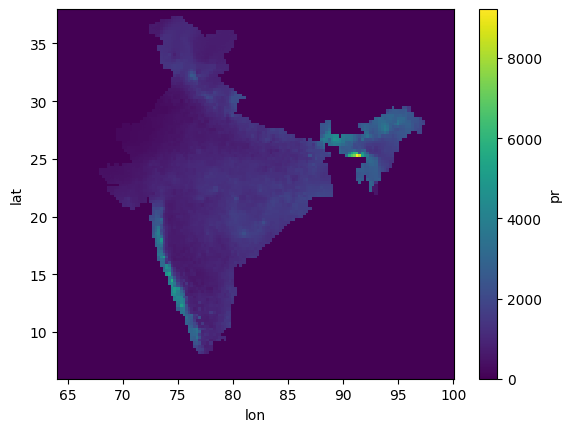

In [3]:
ds.pr.plot()

In [4]:
import xarray as xr
import pandas as pd

lat = 22
lng = 84



netcdf_file_path_hist = '/home/kishan/datahub/climate/GCM_DS/Yearly_mean/hist_pr.nc'
netcdf_file_path_imd ='/home/kishan/datahub/climate/GCM_DS/EM_imd/historical/pr_1979_2014.nc'
netcdf_file_path_ssp245_near ='/home/kishan/datahub/climate/GCM_DS/Yearly_mean/ssp245_pr_2015_2040.nc'
netcdf_file_path_ssp585_near ='/home/kishan/datahub/climate/GCM_DS/Yearly_mean/ssp585_pr_2015_2040.nc'
netcdf_file_path_ssp245_mid ='/home/kishan/datahub/climate/GCM_DS/Yearly_mean/ssp245_pr_2041_2070.nc'
netcdf_file_path_ssp585_mid ='/home/kishan/datahub/climate/GCM_DS/Yearly_mean/ssp585_pr_2041_2070.nc'
netcdf_file_path_ssp245_far ='/home/kishan/datahub/climate/GCM_DS/Yearly_mean/ssp245_pr_2071_2100.nc'
netcdf_file_path_ssp585_far ='/home/kishan/datahub/climate/GCM_DS/Yearly_mean/ssp585_pr_2071_2100.nc'


# Load the datasets
ds_hist = xr.open_dataset(netcdf_file_path_hist).sel(lat=lat, lon=lng, method='nearest').pr.drop_vars(['lat', 'lon'])
ds__imd = xr.open_dataset(netcdf_file_path_imd).sel(lat=lat, lon=lng, method='nearest').pr.drop_vars(['lat', 'lon'])
ds_ssp245_near = xr.open_dataset(netcdf_file_path_ssp245_near).sel(lat=lat, lon=lng, method='nearest').pr.drop_vars(['lat', 'lon'])
ds_ssp585_near= xr.open_dataset(netcdf_file_path_ssp585_near).sel(lat=lat, lon=lng, method='nearest').pr.drop_vars(['lat', 'lon'])
ds_ssp245_mid = xr.open_dataset(netcdf_file_path_ssp245_mid).sel(lat=lat, lon=lng, method='nearest').pr.drop_vars(['lat', 'lon'])
ds_ssp245_far = xr.open_dataset(netcdf_file_path_ssp245_far).sel(lat=lat, lon=lng, method='nearest').pr.drop_vars(['lat', 'lon'])
ds_ssp585_mid = xr.open_dataset(netcdf_file_path_ssp585_mid).sel(lat=lat, lon=lng, method='nearest').pr.drop_vars(['lat', 'lon'])
ds_ssp585_far = xr.open_dataset(netcdf_file_path_ssp585_far).sel(lat=lat, lon=lng, method='nearest').pr.drop_vars(['lat', 'lon'])


ds_imd=ds__imd.resample(time='YE').sum()
# Merge SSP245 datasets
ds_ssp245 = xr.concat([ds_ssp245_near, ds_ssp245_mid, ds_ssp245_far], dim='time')

# Merge SSP585 datasets
ds_ssp585 = xr.concat([ds_ssp585_near, ds_ssp585_mid, ds_ssp585_far], dim='time')
# Rename the columns to indicate their source before merging
# Convert datetime64[ns] to date (without time)
ds_hist['time'] = ds_hist['time'].dt.strftime('%Y-%m-%d')
ds_imd['time'] = ds_imd['time'].dt.strftime('%Y-%m-%d')
ds_ssp245['time'] = ds_ssp245['time'].dt.strftime('%Y-%m-%d')
ds_ssp585['time'] = ds_ssp585['time'].dt.strftime('%Y-%m-%d')

ds_hist = ds_hist.rename('historical')
ds_imd = ds_imd.rename('observed')
ds_ssp245 = ds_ssp245.rename('ssp2.45')
ds_ssp585 = ds_ssp585.rename('ssp5.85')

# Merge all DataFrames on their common date-time index
# Merge hist and imd datasets
ds_hist_imd = xr.merge([ds_hist, ds_imd])
# Merge SSP245 and SSP585 datasets
ds_ssp245_ssp585 = xr.merge([ds_ssp245, ds_ssp585])
ds_concat = xr.merge([ds_hist_imd, ds_ssp245_ssp585], compat='override').to_dataframe()
Data=ds_concat.to_csv()
ds_concat


,historical,observed,ssp2.45,ssp5.85
time,,,,
1979-12-31,1556.679469,1556.679469,NaN,NaN
1980-12-31,1472.532598,1472.532598,NaN,NaN
1981-12-31,1266.477474,1266.477474,NaN,NaN
1982-12-31,1436.877442,1436.877442,NaN,NaN
1983-12-31,1203.448868,1203.448868,NaN,NaN
...,...,...,...,...
2096-12-31,NaN,NaN,1411.147264,1119.867530
2097-12-31,NaN,NaN,1952.333189,1650.818398
2098-12-31,NaN,NaN,1301.653599,1541.853160


In [2]:
import pandas as pd
import xarray as xr


lat = 22
lng = 84
netcdf_file_path_hist = '/home/kishan/datahub/climate/GCM_DS/EM_imd/historical/pr_1979_2014.nc'
netcdf_file_path_imd ='/home/kishan/datahub/meteorology/IMD/pr_interpolated_125.nc'
netcdf_file_path_ssp245 ='/home/kishan/datahub/climate/GCM_DS/EM_imd/ssp245/pr_2015_2100.nc'
netcdf_file_path_ssp585 ='/home/kishan/datahub/climate/GCM_DS/EM_imd/ssp585/pr_2015_2100.nc'


# Load the datasets
ds_hist = xr.open_dataset(netcdf_file_path_hist).sel(lat=lat, lon=lng, method='nearest').pr.drop_vars(['lat', 'lon'])
ds__imd = xr.open_dataset(netcdf_file_path_imd).sel(lat=lat, lon=lng, method='nearest').pr.drop_vars(['lat', 'lon'])
ds_ssp245 =xr.open_dataset(netcdf_file_path_ssp245).sel(lat=lat, lon=lng, method='nearest').pr.drop_vars(['lat', 'lon'])
ds_ssp585 =xr.open_dataset(netcdf_file_path_ssp585).sel(lat=lat, lon=lng, method='nearest').pr.drop_vars(['lat', 'lon'])


ds_hist['time'] = ds_hist['time'].dt.strftime('%Y-%m-%d')
ds__imd['time'] = ds__imd['time'].dt.strftime('%Y-%m-%d')
ds_ssp245['time'] = ds_ssp245['time'].dt.strftime('%Y-%m-%d')
ds_ssp585['time'] = ds_ssp585['time'].dt.strftime('%Y-%m-%d')

ds_hist = ds_hist.to_dataframe().rename(columns={'pr': 'hist'})
ds__imd = ds__imd.to_dataframe().rename(columns={'pr': 'observed'})
ds_ssp245 = ds_ssp245.to_dataframe().rename(columns={'pr': 'ssp2.45'})
ds_ssp585 = ds_ssp585.to_dataframe().rename(columns={'pr': 'ssp5.85'})


# Merge all DataFrames on their common date-time index
df_hist_imd = ds_hist.join([ds__imd], how='outer')
df_ssp245_ssp585 = ds_ssp245.join([ ds_ssp585], how='outer')
merged_df = pd.concat([df_hist_imd, df_ssp245_ssp585])
Data=merged_df.to_csv()
df_hist_imd
# Merge all DataFrames on their common date-time index
# Merge hist and imd datasets
# ds_hist_imd = xr.merge([ds_hist, ds__imd])
# # Merge SSP245 and SSP585 datasets
# ds_ssp245_ssp585 = xr.merge([ds_ssp245, ds_ssp585])
# df_concat = xr.merge([ds_hist_imd, ds_ssp245_ssp585], compat='override').to_dataframe()
# Data=df_concat.to_csv()


In [67]:
import xarray as xr
import pandas as pd
lat=22
lng=84

netcdf_file_path_hist = '/home/kishan/datahub/climate/GCM_DS/EM/historical/tasmax_1979_2014.nc'
netcdf_file_path_imdaa ='/home/kishan/datahub/meteorology/IMDAA/tasmax.nc'
netcdf_file_path_ssp245 ='/home/kishan/datahub/climate/GCM_DS/EM/ssp245/tasmax_2015_2100.nc'
netcdf_file_path_ssp585 ='/home/kishan/datahub/climate/GCM_DS/EM/ssp585/tasmax_2015_2100.nc'

# Load the datasets
ds_hist = xr.open_dataset(netcdf_file_path_hist).sel(lat=lat, lon=lng, method='nearest').tasmax.drop_vars(['lat', 'lon','height'])
ds_imdaa = xr.open_dataset(netcdf_file_path_imdaa).sel(latitude=lat, longitude=lng, method='nearest').tasmax.drop_vars(['latitude', 'longitude'])
ds_ssp245 =xr.open_dataset(netcdf_file_path_ssp245).sel(lat=lat, lon=lng, method='nearest').tasmax.drop_vars(['lat', 'lon','height'])
ds_ssp585 =xr.open_dataset(netcdf_file_path_ssp585).sel(lat=lat, lon=lng, method='nearest').tasmax.drop_vars(['lat', 'lon','height'])

v_imdaa=ds_imdaa.sel(time=slice('1979','2014'))
v=v_imdaa.resample(time='YE').mean()

ds_hist['time'] = ds_hist['time'].dt.strftime('%Y-%m-%d')
# ds_ssp245['time'] = ds_ssp245['time'].dt.strftime('%Y-%m-%d')
# ds_ssp585['time'] = ds_ssp585['time'].dt.strftime('%Y-%m-%d')

# Convert to DataFrames
df_imdaa = v.to_dataframe()
df_hist = ds_hist.to_dataframe()
df_ssp245 = ds_ssp245.to_dataframe()
df_ssp585 = ds_ssp585.to_dataframe()



# Rename the columns to indicate their source before merging
df_hist = df_hist.rename(columns={'tasmax': 'hist'})
df_imdaa = df_imdaa.rename(columns={'tasmax': 'observed'})
df_ssp245 = df_ssp245.rename(columns={'tasmax': 'ssp2.45'})
df_ssp585 = df_ssp585.rename(columns={'tasmax': 'ssp5.85'})

# Merge all DataFrames on their common date-time index
df_hist_imd = df_hist.join([df_imdaa], how='outer')
df_ssp245_ssp585 = df_ssp245.join([ df_ssp585], how='outer')
# Merge the DataFrames by concatenating them along the rows (time index)
merged_df = pd.concat([df_hist_imd, df_ssp245_ssp585])
Data=merged_df.to_csv()
ds_hist

<xarray.DataArray 'tasmax' (time: 13140)> Size: 53kB
[13140 values with dtype=float32]
Coordinates:
  * time     (time) object 105kB '1979-01-01' '1979-01-02' ... '2014-12-31'

In [6]:
import pandas as pd
import xarray as xr
import time
lat=22
lng=84
# def mergeppt(df_hist, df_imd, merged_ssp245,merged_ssp585):
#     # Rename the columns to indicate their source before merging
#     df_hist = df_hist.rename(columns={'pr': 'hist'})
#     df_imd = df_imd.rename(columns={'pr': 'observed'})
#     df_ssp245 = merged_ssp245.rename(columns={'pr': 'ssp245'})
#     df_ssp585 = merged_ssp585.rename(columns={'pr': 'ssp585'})

#     # Merge all DataFrames on their common date-time index
#     df_hist_imd = df_hist.join([df_imd], how='outer')
#     df_ssp245_ssp585 = df_ssp245.join([ df_ssp585], how='outer')
    
    
#     # Merge the DataFrames by concatenating them along the rows (time index)
#     merged_df = pd.concat([df_hist_imd, df_ssp245_ssp585])
    
#     merged_df.to_csv()
#     return merged_df

netcdf_file_path_hist = '/home/kishan/datahub/climate/GCM_DS/EM_imd/historical/pr_1979_2014.nc'
netcdf_file_path_imd ='/home/kishan/datahub/meteorology/IMD/pr_interpolated_125.nc'
netcdf_file_path_ssp245 ='/home/kishan/datahub/climate/GCM_DS/EM/ssp245_pr/pr_2015_2100.nc'
netcdf_file_path_ssp585 ='/home/kishan/datahub/climate/GCM_DS/EM/ssp545_pr/pr_2015_2100.nc'
start_time = time.time()
# Load the datasets
ds_hist = xr.open_dataset(netcdf_file_path_hist).sel(lat=lat, lon=lng, method='nearest').pr.drop_vars(['lat', 'lon'])
ds_imd = xr.open_dataset(netcdf_file_path_imd).sel(lat=lat, lon=lng, method='nearest').pr.drop_vars(['lat', 'lon'])
ds_ssp245 =xr.open_dataset(netcdf_file_path_ssp245).sel(lat=lat, lon=lng, method='nearest').pr.drop_vars(['lat', 'lon'])
ds_ssp585 =xr.open_dataset(netcdf_file_path_ssp585).sel(lat=lat, lon=lng, method='nearest').pr.drop_vars(['lat', 'lon'])
# Add a timestamp after processing the float values
end_time = time.time()
print(f"Time taken to process datasets: {end_time - start_time:.6f} seconds")
start_time = time.time()
# Convert to DataFrames
ds_hist = ds_hist.rename('historical')
ds_imd = ds_imd.rename('observed')
ds_ssp245 = ds_ssp245.rename('ssp2.45')
ds_ssp585 = ds_ssp585.rename('ssp5.85')
# Add a timestamp after processing the float values
end_time = time.time()
print(f"Time taken to rename: {end_time - start_time:.6f} seconds")
start_time = time.time()
ds_hist_imd = xr.merge([ds_hist, ds_imd])
# Merge SSP245 and SSP585 datasets
ds_ssp245_ssp585 = xr.merge([ds_ssp245, ds_ssp585])
end_time = time.time()
print(f"Time taken to merge partial datasets: {end_time - start_time:.6f} seconds")
start_time = time.time()
ds_concat = xr.merge([ds_hist_imd, ds_ssp245_ssp585], compat='override')
end_time = time.time()
print(f"Time taken to merge complete datasets: {end_time - start_time:.6f} seconds")
start_time = time.time()
df_concat=ds_concat.to_dataframe()
end_time = time.time()
print(f"Time taken to convert datasets: {end_time - start_time:.6f} seconds")
start_time = time.time()
Data=df_concat.to_csv()
end_time = time.time()
print(f"Time taken to convert to csv: {end_time - start_time:.6f} seconds")
df_concat

Time taken to process datasets: 0.331799 seconds
Time taken to rename: 0.000101 seconds
Time taken to merge partial datasets: 0.233204 seconds
Time taken to merge complete datasets: 96.569675 seconds
Time taken to convert datasets: 0.001704 seconds
Time taken to convert to csv: 0.197329 seconds


,historical,observed,ssp2.45,ssp5.85
time,,,,
1979-01-01 00:00:00,NaN,0.0,NaN,NaN
1979-01-01 12:00:00,0.293786,NaN,NaN,NaN
1979-01-02 00:00:00,NaN,0.0,NaN,NaN
1979-01-02 12:00:00,0.718291,NaN,NaN,NaN
1979-01-03 00:00:00,NaN,0.0,NaN,NaN
...,...,...,...,...
2100-12-27 12:00:00,NaN,NaN,0.299200,0.168600
2100-12-28 12:00:00,NaN,NaN,0.328978,0.142339
2100-12-29 12:00:00,NaN,NaN,0.275092,0.063943


In [12]:
#code to resample data into monthly and yearly scale
import xarray as xr
import os

# List of NetCDF file paths
nc_files = [
    # '/home/kishan/datahub/climate/GCM_DS1/EM_imd/historical/pr_1979_2014.nc',
    # '/home/kishan/datahub/meteorology/IMD/pr_interpolated_125.nc',
    # '/home/kishan/datahub/climate/GCM_DS1/EM/ssp245_pr/pr_2015_2100.nc',
    '/home/kishan/datahub/climate/GCM_DS1/EM/ssp545_pr/pr_2015_2100.nc',

    # '/home/kishan/datahub/climate/GCM_DS1/EM/historical/tasmax_1979_2014.nc',
    # '/home/kishan/datahub/meteorology/IMDAA/tasmax.nc',
    # '/home/kishan/datahub/climate/GCM_DS1/EM/ssp245/tasmax_2015_2100.nc',
    # '/home/kishan/datahub/climate/GCM_DS1/EM/ssp585/tasmax_2015_2100.nc',

    # '/home/kishan/datahub/climate/GCM_DS1/EM/historical/tasmin_1979_2014.nc',
    # '/home/kishan/datahub/meteorology/IMDAA/tasmin.nc',
    # '/home/kishan/datahub/climate/GCM_DS1/EM/ssp245/tasmin_2015_2100.nc',
    # '/home/kishan/datahub/climate/GCM_DS1/EM/ssp585/tasmin_2015_2100.nc'
]

# Define the output directory where the resampled files will be saved
output_base_dir = '/home/kishan/datahub/climate/GCM_DS1/temp'

# Create the output directory if it doesn't exist
os.makedirs(output_base_dir, exist_ok=True)

# Loop over each NetCDF file
for file_path in nc_files:
    # Load the daily NetCDF file
    ds = xr.open_dataset(file_path)

    # Resample the data to monthly and annual means
    monthly_ds = ds.resample(time='M').sum()
    annual_ds = ds.resample(time='Y').sum()

    # Generate the new file names with "_monthly" and "_yearly" tags
    file_dir, file_name = os.path.split(file_path)
    base_name, ext = os.path.splitext(file_name)

    # Define the full paths for the new files
    monthly_file_path = os.path.join(output_base_dir, f"{base_name}_monthly{ext}")
    annual_file_path = os.path.join(output_base_dir, f"{base_name}_yearly{ext}")

    # Save the resampled datasets to new NetCDF files in the output directory
    monthly_ds.to_netcdf(monthly_file_path)
    annual_ds.to_netcdf(annual_file_path)

    print(f"Processed and saved: {monthly_file_path}")
    print(f"Processed and saved: {annual_file_path}")

<string>:6: FutureWarning: 'M' is deprecated and will be removed in a future version. Please use 'ME' instead of 'M'.
<string>:6: FutureWarning: 'Y' is deprecated and will be removed in a future version. Please use 'YE' instead of 'Y'.


Processed and saved: /home/kishan/datahub/climate/GCM_DS1/temp/pr_2015_2100_monthly.nc
Processed and saved: /home/kishan/datahub/climate/GCM_DS1/temp/pr_2015_2100_yearly.nc


In [ ]:
ds_hist_imd = xr.merge([ds_hist, ds_imd])
ds_ssp245_ssp585 = xr.merge([ds_ssp245, ds_ssp585])
ds_concat = xr.merge([ds_hist_imd, ds_ssp245_ssp585], compat='override')

IndentationError: unexpected indent (1383685632.py, line 2)

In [ ]:
valuearray=ds.TMP_2m
valuearray
valuearray1=ds1.TMP_2m
valuearray1

<xarray.DataArray 'TMP_2m' (time: 2557, latitude: 8, longitude: 16)> Size: 1MB
[327296 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float64 128B 75.96 76.08 76.2 ... 77.52 77.64 77.76
  * latitude   (latitude) float64 64B 31.56 31.68 31.8 ... 32.16 32.28 32.4
  * time       (time) datetime64[ns] 20kB 2014-01-01 2014-01-02 ... 2020-12-31
Attributes:
    grid_mapping:  spatial_ref

In [ ]:
val=valuearray.sel(longitude=77, latitude=28, method='nearest')
a=val.sel(time='2014-01-01T00:00:00.000000000')
a.values


array(5.5937195, dtype=float32)

In [ ]:
val1=valuearray1.sel(longitude=77, latitude=28, method='nearest')
a1=val1.sel(time='2014-01-01T00:00:00.000000000')
a1.values

array(9.354401, dtype=float32)

In [ ]:
from bokeh.plotting import figure, show
from bokeh.models import HoverTool, TapTool, CustomJS



In [ ]:
    # Convert data to a DataFrame
df = val.to_dataframe()
df1= val1.to_dataframe()

    # Create a Bokeh figure
p = figure(title="Time Series Plot", x_axis_label='Date', y_axis_label='PPT', x_axis_type='datetime', width=2000, height=1500)

    

    # Plot the time se__xarray_dataarray_variable__ries data
p.line(df1.index, df['TMP_2m'], legend_label='Tmax', line_width=1,color="yellow")
p.line(df.index, df['TMP_2m'], legend_label='Tmin', line_width=0.1,color="green")



   # Add hover tool
hover = HoverTool(tooltips=[
    ("Date", "@x{%d/%m/%Y}"),
    ("windspeed", "@y"),
],formatters={'@x': 'datetime'})
p.add_tools(hover)


tap = TapTool()
tap.callback = CustomJS(args=dict(hover=hover), code="""
    if (!hover.active) {
        hover.active = true;
    } else {
        hover.active = false;
    }
""")
p.add_tools(tap)

show(p)

In [10]:
# Define path to NetCDF file (assuming 'nc' subfolder in static)

# netcdf_file_path = "all_data_siddik/imd/pr.nc"
# netcdf_file_path1 = "all_data_siddik/hist/pr_1979_2100.nc"
# netcdf_file_path2 = "all_data_siddik/ssp245/pr_2015_2100.nc"
# netcdf_file_path3 = "/media/kishan/all_data_siddik/ssp585/pr_2015_2100.nc"
lat=33.1
lng=77.8
# Load the datasets
# ds = xr.open_dataset("/media/kishan/all_data_siddik/imd/pr.nc")
ds1 = xr.open_dataset("/media/kishan/all_data_siddik/hist/pr_1979_2014.nc")
ds2 = xr.open_dataset("/media/kishan/all_data_siddik/ssp245/pr_2015_2100.nc")

ds3 = xr.open_dataset("/media/kishan/all_data_siddik/ssp585/pr_2015_2100.nc")

# Optionally slice the time range
# ds = ds.sel(time=slice('1979', '2014'))

# Print dataset details to confirm coordinate names
# print(ds)
# print("Coordinates of ds:", ds.coords)

# Access the precipitation data
# valuearray = ds.pr
valuearray1 = ds1.pr
valuearray2 = ds2.pr
valuearray3 = ds3.pr



# Data selection using consistent coordinate names, adjust as per actual names in the dataset
# val = valuearray.sel(latitude=lat, longitude=lng, method='nearest')
val1 = valuearray1.sel(lat=lat, lon=lng, method='nearest')  # Ensure correct coordinate names
val2 = valuearray2.sel(lat=lat, lon=lng, method='nearest')
val3 = valuearray3.sel(lat=lat, lon=lng, method='nearest')

# Resample and sum by year directly from xarray DataArray
# imd = val.resample(time='Y').sum()
hist = val1.resample(time='Y').sum()
ssp245 = val2.resample(time='Y').sum()
ssp585 = val3.resample(time='Y').sum()

# Convert to DataFrames
# df = imd.to_dataframe()
df1 = hist.to_dataframe()
df2 = ssp245.to_dataframe()
df3 = ssp585.to_dataframe()

# Create a Bokeh figure
p = figure(title="Time Series Plot", x_axis_label='Date', y_axis_label='PPT', x_axis_type='datetime', width=700)



# Plot the time series data
# p.line(df.index, df['pr'], legend_label='imd', line_width=2)
hist_line=p.line(df1.index, df['pr'], legend_label='hist', color='orange', line_width=2)
ssp245_line=p.line(df2.index, df['pr'], legend_label='ssp245',  color='red', line_width=2)
ssp585_line=p.line(df3.index, df['pr'], legend_label='ssp585',  color='green', line_width=2)


# Create toggle buttons
y1_toggle = Toggle(label="hist", active=False, button_type="success")
y2_toggle = Toggle(label="ssp245", active=False, button_type="success")
y3_toggle = Toggle(label="ssp585", active=False, button_type="success")

# Add callback to toggle visibility
y1_toggle.js_link('active', hist_line, 'visible')
y2_toggle.js_link('active', ssp245_line, 'visible')
y3_toggle.js_link('active', ssp585_line, 'visible')



# Hide the Bokeh logo from the toolbar
p.toolbar.logo = None

# Add hover tool
hover = HoverTool(tooltips=[
    ("Date", "@x{%d/%m/%Y}"),
    ("Wind Speed", "@y"),
], formatters={'@x': 'datetime'})
p.add_tools(hover)

tap = TapTool()
tap.callback = CustomJS(args=dict(hover=hover), code="""
    if (!hover.active) {
        hover.active = true;
    } else {
        hover.active = false;
    }
""")
p.add_tools(tap)

/home/kishan/.local/lib/python3.10/site-packages/xarray/core/groupby.py:532: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  index_grouper = pd.Grouper(
/home/kishan/.local/lib/python3.10/site-packages/xarray/core/groupby.py:532: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  index_grouper = pd.Grouper(
/home/kishan/.local/lib/python3.10/site-packages/xarray/core/groupby.py:532: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  index_grouper = pd.Grouper(


KeyboardInterrupt: 

In [ ]:


# prepare some data
x = list(range(11))
y0 = x
y1 = [10 - i for i in x]
y2 = [abs(i - 5) for i in x]

# create a new plot with a title and axis labels
p = figure(title="Simple line example", x_axis_label="x", y_axis_label="y")

# add multiple renderers
p.line(x, y1, legend_label="Temp.", color="blue", line_width=2)
p.line(x, y2, legend_label="Rate", color="red", line_width=2)
p.line(x, y0, legend_label="Objects", color="green", line_width=2)


# Add hover tool
hover = HoverTool(tooltips=[
    ("(x,y)", "($x, $y)")
])
p.add_tools(hover)


tap = TapTool()
tap.callback = CustomJS(args=dict(hover=hover), code="""
    if (!hover.active) {
        hover.active = true;
    } else {
        hover.active = false;
    }
""")
p.add_tools(tap)

# show the results
show(p)

In [ ]:
# Read data from NetCDF file
ds = xr.open_dataset('wind.nc')
valuearray = ds.__xarray_dataarray_variable__

    # Select data at specific latitude and longitude (e.g., Delhi coordinates)
val = valuearray.sel(lon=72.88662753964906, lat=19.08157715, method='nearest')

    # Convert data to a DataFrame
df = val.to_dataframe()

    # Create a Bokeh figure
p = figure(title="Time Series Plot", x_axis_label='Date', y_axis_label='Wind Speed', x_axis_type='datetime', width=1000)

    

    # Plot the time series data
p.line(df.index, df['__xarray_dataarray_variable__'], legend_label='Wind Speed', line_width=2)


   # Add hover tool
hover = HoverTool(tooltips=[
    ("Date", "@x{%d/%m/%Y}"),
    ("Wind Speed", "@y"),
],formatters={'@x': 'datetime'})
p.add_tools(hover)


tap = TapTool()
tap.callback = CustomJS(args=dict(hover=hover), code="""
    if (!hover.active) {
        hover.active = true;
    } else {
        hover.active = false;
    }
""")
p.add_tools(tap)
show(p)
